<a href="https://colab.research.google.com/github/Joycechidi/Deep-Learning-/blob/master/CNN/conv_layer_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Layer

In this notebook, we visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer. 



## Import the image

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

import cv2
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
#image path on My Google Drive

img_path = os.path.join("/content/gdrive/My Drive/Udacity_AI_Codes/DLND_Works/data/my_face.png")


## Load the color image, Convert to Grayscale

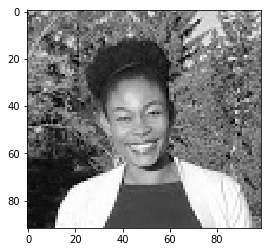

In [5]:
#load color image
bgr_image = cv2.imread(img_path)

#Convert the image to grayscale
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

#normalize, rescale entries to lie in [0, 1]
gray_image = gray_image.astype('float32')/255

#plot the image
plt.imshow(gray_image, cmap='gray')
plt.show()

## Define and visualize the filters

In [9]:
import numpy as np

#Apply a filter
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [10]:
#Defining 4 different filters,
#all of which are linear combinationsof the 'filter_vals' defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

#For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


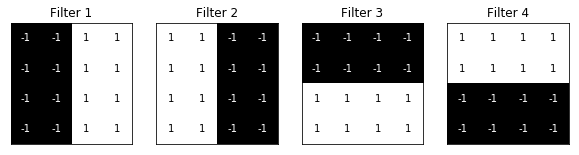

In [11]:
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='white' if filters[i][x][y]<0 else 'black')

# Define a convolutional and pooling layer

**Convolutional layer**

Initialize a single convolutional layer so that it contains all my created filters. 
I'm only initializing the weights in a convolutional layer so that I can visualize what happens after a forward pass through this network!

#### `__init__` and `forward`
To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the forward behavior of a network that applies those initialized layers to an input (`x`) in the function `forward`. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python. 

Below, I define the structure of a class called `Net` that has a convolutional layer that can contain four 4x4 grayscale filters.

You've seen how to define a convolutional layer, I added a pooling layer:

**Pooling layer

In the next cell, we initialize a convolutional layer so that it contains all the created filters. Then add a maxpooling layer, documented here, with a kernel size of (2x2) so you can see that the image resolution has been reduced after this step!

A maxpooling layer reduces the x-y size of an input and only keeps the most active pixel values. Below is an example of a 2x2 pooling kernel, with a stride of 2, applied to a small patch of grayscale pixel values; reducing the x-y size of the patch by a factor of 2. Only the maximum pixel values in 2x2 remain in the new, pooled output.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F


#define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        #initializes thw weights of the convolutional layer to be the weight
        k_height, k_width = weight.shape[2:]
        # assume that there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
        #define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        #calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        #apply a pooling layer
        pooled_x = self.pool(activated_x)
        
        #returns both layers
        return conv_x, activated_x, pooled_x
    
#instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

#print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


# Visualize the output of each filter

First, I'll define a helper function, viz_layer that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [0]:
#helper function for visualixing the output of a given layer
#default number of filters is 4 for this project

def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Below code will help us see the output of a convolutional layer after a ReLu activation function is applied.

Let's apply ReLu activation and see the difference in the output

### ReLu Activation Function

In this model, I'll use an activation function that scales the output of the convolutional layer. 
I've chose a ReLu function to do this, and this function simply turns all negative pixel values in 0's (black). 

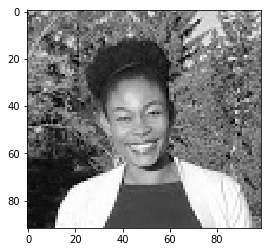

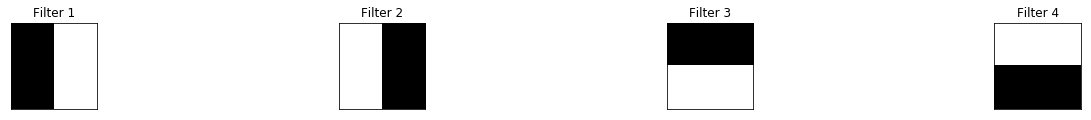

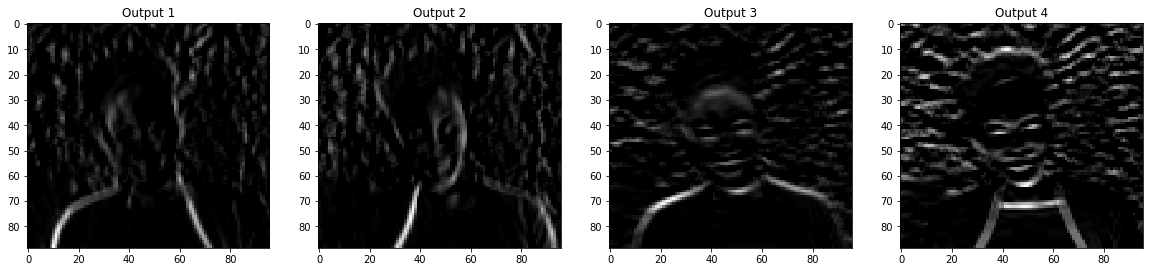

In [21]:
# plot original image
plt.imshow(gray_image, cmap='gray')

#visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    
    
# convert the image into an input Tensor
gray_image_tensor = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pooled_layer = model(gray_image_tensor)

#visualize the output of a conv layer
viz_layer(activated_layer)

# Visualize the output of the pooling layer

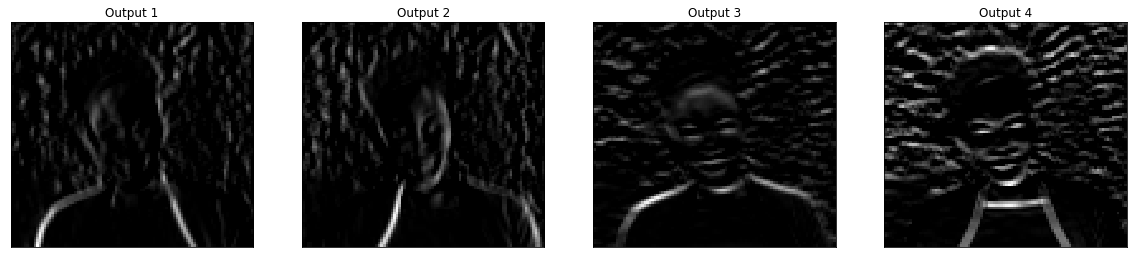

In [16]:
#after a ReLu is applied
#visualize the output of an activated convolutional layer
viz_layer(activated_layer)

Then, take a look at the output of a pooling layer. The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps, by some pooling factor, by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.

Take a look at the values on the x, y axes to see how the image has changed size.

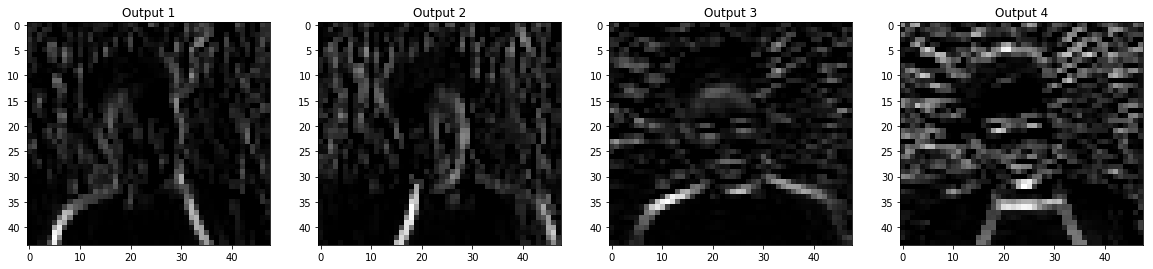

In [22]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)